<a href="https://colab.research.google.com/github/muffafa/advent-of-haystack-2024-2025-solutions/blob/main/Solution_Advent_of_Haystack_Enhancing_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advent of Haystack: Day 1
_Make a copy of this Colab to start!_

In this first challenge, we are going to build a pipeline that answers questions based on the contents of a URL. The given pipeline works as it, but your task is to complete the connnections and add the **other required two components**👇

### Initial Components to use:
- [`LinkContentFetcher`](https://docs.haystack.deepset.ai/docs/linkcontentfetcher) for using the contents of several URLs in your pipeline
- [`HTMLToDocument`](https://docs.haystack.deepset.ai/docs/htmltodocument) for converting the HTML files into documents.
- [`PromptBuilder`](https://docs.haystack.deepset.ai/docs/promptbuilder) for creating the prompt
- [`OpenAIGenerator`](https://docs.haystack.deepset.ai/docs/openaigenerator) for generating responses

### 1) Installation

Install `haystack-ai`, `trafilatura` and `sentence-transformers` packages with `pip`:

In [ ]:
!pip install haystack-ai trafilatura "sentence-transformers>=3.0.0"

### (Optional) Change the Logging Level

This way, not only warnings but also information messages are displayed in the console output.

In [ ]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.DEBUG)

### 2) Enter API key for OpenAI
If you will use OpenAI models, save your API key as `OPENAI_API_KEY` environment variable.

In [ ]:
from getpass import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI API key:")

Enter OpenAI API key:··········


### 3) Create components

In [ ]:
from haystack.components.fetchers import LinkContentFetcher
from haystack.components.converters import HTMLToDocument
from haystack.components.preprocessors import DocumentSplitter
from haystack.components.rankers import TransformersSimilarityRanker
from haystack.components.builders import PromptBuilder
from haystack.components.generators import OpenAIGenerator

fetcher = LinkContentFetcher()
converter = HTMLToDocument()
splitter = DocumentSplitter(split_length=10, split_overlap=1, split_by="sentence") # split_overlap is optional
ranker = TransformersSimilarityRanker(model="cross-encoder/ms-marco-MiniLM-L-6-v2", top_k=10) # any Ranker is okay
template = """Given the information below, answer the query. Only use the provided context to generate the answer and output the used document links
            Context:
            {% for document in documents %}
                {{ document.content }}
                URL: {{ document.meta.url }}
            {% endfor %}

            Question: {{ query }}
            Answer:"""

prompt_builder = PromptBuilder(template = template)
generator = OpenAIGenerator(model="gpt-4o-mini")

INFO:haystack.telemetry._telemetry:Haystack sends anonymous usage data to understand the actual usage and steer dev efforts towards features that are most meaningful to users. You can opt-out at anytime by manually setting the environment variable HAYSTACK_TELEMETRY_ENABLED as described for different operating systems in the [documentation page](https://docs.haystack.deepset.ai/docs/telemetry#how-can-i-opt-out). More information at [Telemetry](https://docs.haystack.deepset.ai/docs/telemetry).
DEBUG:haystack.core.component.component:Registering <class 'haystack.components.fetchers.link_content.LinkContentFetcher'> as a component
DEBUG:haystack.core.component.component:Registered Component <class 'haystack.components.fetchers.link_content.LinkContentFetcher'>
DEBUG:haystack.core.component.component:Registering <class 'haystack.components.converters.azure.AzureOCRDocumentConverter'> as a component
DEBUG:haystack.core.component.component:Registered Component <class 'haystack.components.con

### 4) Add them to a Haystack Pipeline

In [ ]:
from haystack import Pipeline

pipeline = Pipeline()
pipeline.add_component(name="fetcher", instance=fetcher)
pipeline.add_component(name="converter", instance=converter)
pipeline.add_component(name="splitter", instance=splitter)
pipeline.add_component(name="ranker", instance=ranker)
pipeline.add_component(name="prompt_builder", instance=prompt_builder)
pipeline.add_component(name="generator", instance=generator)

DEBUG:haystack.core.pipeline.base:Adding component 'fetcher' (<haystack.components.fetchers.link_content.LinkContentFetcher object at 0x7a8c823969b0>

Inputs:
  - urls: List[str]
Outputs:
  - streams: List[ByteStream])
DEBUG:haystack.core.pipeline.base:Adding component 'converter' (<haystack.components.converters.html.HTMLToDocument object at 0x7a8d5886db10>

Inputs:
  - sources: List[Union[str, Path, ByteStream]]
  - meta: Union[Dict[str, Any], List[Dict[str, Any]]]
  - extraction_kwargs: Optional[Dict[str, Any]]
Outputs:
  - documents: List[Document])
DEBUG:haystack.core.pipeline.base:Adding component 'splitter' (<haystack.components.preprocessors.document_splitter.DocumentSplitter object at 0x7a8c29ced810>

Inputs:
  - documents: List[Document]
Outputs:
  - documents: List[Document])
DEBUG:haystack.core.pipeline.base:Adding component 'ranker' (<haystack.components.rankers.transformers_similarity.TransformersSimilarityRanker object at 0x7a8c29ced0f0>

Inputs:
  - query: str
  - docum

###5) Connect the components

Complete the pipeline connections to achieve a working pipeline that can be run.

**Note:** Everytime you want to run cell 4 and cell 5, you need to run cell 3 and reinitialize all components

In [ ]:
pipeline.connect("fetcher", "converter")
pipeline.connect("converter", "splitter")
pipeline.connect("splitter", "ranker")
pipeline.connect("ranker", "prompt_builder.documents")
pipeline.connect("prompt_builder", "generator")

DEBUG:haystack.core.pipeline.base:Connecting 'fetcher.streams' to 'converter.sources'
DEBUG:haystack.core.pipeline.base:Connecting 'converter.documents' to 'splitter.documents'
DEBUG:haystack.core.pipeline.base:Connecting 'splitter.documents' to 'ranker.documents'
DEBUG:haystack.core.pipeline.base:Connecting 'ranker.documents' to 'prompt_builder.documents'
DEBUG:haystack.core.pipeline.base:Connecting 'prompt_builder.prompt' to 'generator.prompt'


🚅 Components
  - fetcher: LinkContentFetcher
  - converter: HTMLToDocument
  - splitter: DocumentSplitter
  - ranker: TransformersSimilarityRanker
  - prompt_builder: PromptBuilder
  - generator: OpenAIGenerator
🛤️ Connections
  - fetcher.streams -> converter.sources (List[ByteStream])
  - converter.documents -> splitter.documents (List[Document])
  - splitter.documents -> ranker.documents (List[Document])
  - ranker.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> generator.prompt (str)

###6) Visualize the Pipeline 🎨

Display the pipeline image with [`show()`](https://docs.haystack.deepset.ai/docs/visualizing-pipelines) method to understand the connections between components

DEBUG:haystack.core.pipeline.draw:Mermaid diagram:

%%{ init: {'theme': 'neutral' } }%%

graph TD;

fetcher["<b>fetcher</b><br><small><i>LinkContentFetcher</i></small>"]:::component -- "streams -> sources<br><small><i>List[ByteStream]</i></small>" --> converter["<b>converter</b><br><small><i>HTMLToDocument<br><br>Optional inputs:<ul style='text-align:left;'><li>meta (Union[Dict[str, Any], List[Dict[str, Any]]])</li><li>extraction_kwargs (Optional[Dict[str, Any]])</li></ul></i></small>"]:::component
converter["<b>converter</b><br><small><i>HTMLToDocument<br><br>Optional inputs:<ul style='text-align:left;'><li>meta (Union[Dict[str, Any], List[Dict[str, Any]]])</li><li>extraction_kwargs (Optional[Dict[str, Any]])</li></ul></i></small>"]:::component -- "documents -> documents<br><small><i>List[Document]</i></small>" --> splitter["<b>splitter</b><br><small><i>DocumentSplitter</i></small>"]:::component
splitter["<b>splitter</b><br><small><i>DocumentSplitter</i></small>"]:::component -- "docu

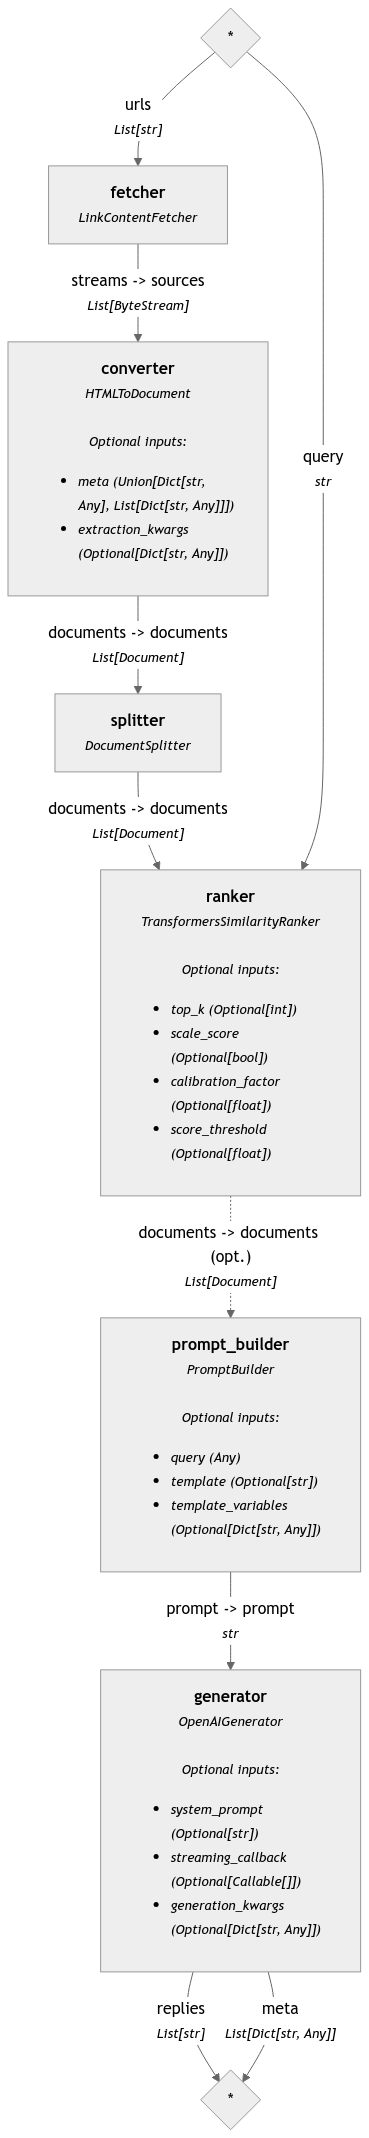

In [ ]:
pipeline.show()

###7) Run the Pipeline

Use the URLs below and try the example queries.

In [ ]:
urls = ["https://haystack.deepset.ai/blog/extracting-metadata-filter",
        "https://haystack.deepset.ai/blog/query-expansion",
        "https://haystack.deepset.ai/blog/query-decomposition",
        "https://haystack.deepset.ai/cookbook/metadata_enrichment"]

## Example queries you can try
# query = "What is the difference between metadata filtering and metadata enrichment?"
query = "Which methods can I use to transform query for better retrieval?"
# query = "How can I use metadata to improve retrieval?"
# query = "What's preprocessing?" # Test if your system hallucinates

## Add parameters
result = pipeline.run(data={"fetcher": {"urls": urls}, "prompt_builder": {"query": query}, "ranker":{"query": query}}, include_outputs_from={"ranker"})

INFO:haystack.core.pipeline.base:Warming up component ranker...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

INFO:haystack.core.pipeline.pipeline:Running component fetcher
INFO:haystack.core.pipeline.pipeline:Running component converter
INFO:haystack.core.pipeline.pipeline:Running component splitter
INFO:haystack.core.pipeline.pipeline:Running component ranker
INFO:haystack.core.pipeline.pipeline:Running component prompt_builder
INFO:haystack.core.pipeline.pipeline:Running component generator


Print the LLM response

In [ ]:
print(result['generator']['replies'][0])

You can use the following methods to transform a query for better retrieval:

1. **Query Expansion**: This technique generates a set of similar queries from the original user query, allowing you to cover variations in wording and meaning. It helps improve retrieval results, especially when the original query is vague or poorly formed. By expanding the query, you can include synonyms and related phrases, which increases recall during keyword-based searches.

2. **Query Decomposition**: This method breaks down complex queries into simpler sub-questions that can be answered independently. This helps in retrieving relevant information for each sub-question, allowing for a more accurate reasoning process to arrive at an overall answer to the original query.

3. **Metadata Filtering**: Extracting concrete metadata from queries allows you to narrow down the search space, ensuring the retrieved information aligns with specific query attributes like date, topic, or source. This results in enhan

If you have enabled `include_outputs_from={"ranker"}`, you'll be able to see the context injected into the prompt

In [ ]:
print(result['ranker']['documents'])

[Document(id=c390618cea3e75e5ac47f3b79cc741ec64f37e9696f423da4cf2df051a5fbdbd, content: ' So, it makes sense to use BM25+query expansion to increase recall in cases where you want to rely o...', meta: {'content_type': 'text/html', 'url': 'https://haystack.deepset.ai/blog/query-expansion', 'source_id': '2a511afa9e381b92df81466e9b6a10219514e8ff8495daf74565168d41b2713e', 'page_number': 1, 'split_id': 1, 'split_idx_start': 1404, '_split_overlap': [{'doc_id': '81ed15357b655decbcb09a7eff69bb0884a40f7419727adabd1329bfbc47127c', 'range': (1404, 1521)}, {'doc_id': '904182a57eaa8321246d62391a238abd028f125718b2032637351130d001741b', 'range': (0, 37)}]}, score: 0.9547014236450195), Document(id=be21cd6cfe6267fe60133815f0be4fa8a58c396864445991216154d8eda2c85d, content: ' While semantic search is a great option, it does require the use of an embedding model, and the exi...', meta: {'content_type': 'text/html', 'url': 'https://haystack.deepset.ai/blog/query-expansion', 'source_id': '2a511afa9e381b92df

## Bonus Task

Try to recreate the same pipeline with [OpenAIChatGenerator](https://docs.haystack.deepset.ai/docs/openaichatgenerator) and [ChatPromptBuilder](https://docs.haystack.deepset.ai/docs/chatpromptbuilder)

In [ ]:
from haystack.components.fetchers import LinkContentFetcher
from haystack.components.converters import HTMLToDocument
from haystack.components.preprocessors import DocumentSplitter
from haystack.components.rankers import TransformersSimilarityRanker
from haystack.components.generators.chat import OpenAIChatGenerator
from haystack.components.builders import ChatPromptBuilder
from haystack.dataclasses import ChatMessage

fetcher = LinkContentFetcher()
converter = HTMLToDocument()
splitter = DocumentSplitter(split_length=10, split_overlap=1, split_by="sentence") # split_overlap is optional
ranker = TransformersSimilarityRanker(model="cross-encoder/ms-marco-MiniLM-L-6-v2", top_k=10) # any Ranker is okay

system_message = """
You are a technical expert. Use only the provided content and source URLs to answer questions. Don't use your own knowledge.
Do not add any extra information or search the web.
Keep your answers clear, accurate, and to the point, including the document links you used.
If the documents don’t have the answer, say "no answer"
"""

user_template = """
            Context:
            {% for document in documents %}
                {{ document.content }}
                URL: {{ document.meta.url }}
            {% endfor %}

            Question: {{ query }}
            Answer:"""

template = [ChatMessage.from_system(system_message), ChatMessage.from_user(user_template)]
prompt_builder = ChatPromptBuilder(template = template)
generator = OpenAIChatGenerator(model="gpt-4")

DEBUG:haystack.core.component.component:Registering <class 'haystack.components.generators.chat.openai.OpenAIChatGenerator'> as a component
DEBUG:haystack.core.component.component:Registered Component <class 'haystack.components.generators.chat.openai.OpenAIChatGenerator'>
DEBUG:haystack.core.component.component:Registering <class 'haystack.components.generators.chat.azure.AzureOpenAIChatGenerator'> as a component
DEBUG:haystack.core.component.component:Registered Component <class 'haystack.components.generators.chat.azure.AzureOpenAIChatGenerator'>
DEBUG:haystack.core.component.component:Registering <class 'haystack.components.generators.chat.hugging_face_local.HuggingFaceLocalChatGenerator'> as a component
DEBUG:haystack.core.component.component:Registered Component <class 'haystack.components.generators.chat.hugging_face_local.HuggingFaceLocalChatGenerator'>
DEBUG:haystack.core.component.component:Registering <class 'haystack.components.generators.chat.hugging_face_api.HuggingFaceAP

In [ ]:
from haystack import Pipeline

pipeline = Pipeline()
pipeline.add_component(name="fetcher", instance=fetcher)
pipeline.add_component(name="converter", instance=converter)
pipeline.add_component(name="splitter", instance=splitter)
pipeline.add_component(name="ranker", instance=ranker)
pipeline.add_component(name="prompt_builder", instance=prompt_builder)
pipeline.add_component(name="generator", instance=generator)

pipeline.connect("fetcher", "converter")
pipeline.connect("converter", "splitter")
pipeline.connect("splitter", "ranker")
pipeline.connect("ranker", "prompt_builder.documents")
pipeline.connect("prompt_builder", "generator")

DEBUG:haystack.core.pipeline.base:Adding component 'fetcher' (<haystack.components.fetchers.link_content.LinkContentFetcher object at 0x7a8d5886f0d0>

Inputs:
  - urls: List[str]
Outputs:
  - streams: List[ByteStream])
DEBUG:haystack.core.pipeline.base:Adding component 'converter' (<haystack.components.converters.html.HTMLToDocument object at 0x7a8d5886f8e0>

Inputs:
  - sources: List[Union[str, Path, ByteStream]]
  - meta: Union[Dict[str, Any], List[Dict[str, Any]]]
  - extraction_kwargs: Optional[Dict[str, Any]]
Outputs:
  - documents: List[Document])
DEBUG:haystack.core.pipeline.base:Adding component 'splitter' (<haystack.components.preprocessors.document_splitter.DocumentSplitter object at 0x7a8c2981d090>

Inputs:
  - documents: List[Document]
Outputs:
  - documents: List[Document])
DEBUG:haystack.core.pipeline.base:Adding component 'ranker' (<haystack.components.rankers.transformers_similarity.TransformersSimilarityRanker object at 0x7a8c2981d120>

Inputs:
  - query: str
  - docum

🚅 Components
  - fetcher: LinkContentFetcher
  - converter: HTMLToDocument
  - splitter: DocumentSplitter
  - ranker: TransformersSimilarityRanker
  - prompt_builder: ChatPromptBuilder
  - generator: OpenAIChatGenerator
🛤️ Connections
  - fetcher.streams -> converter.sources (List[ByteStream])
  - converter.documents -> splitter.documents (List[Document])
  - splitter.documents -> ranker.documents (List[Document])
  - ranker.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> generator.messages (List[ChatMessage])

In [ ]:
urls = ["https://haystack.deepset.ai/blog/extracting-metadata-filter",
        "https://haystack.deepset.ai/blog/query-expansion",
        "https://haystack.deepset.ai/blog/query-decomposition",
        "https://haystack.deepset.ai/cookbook/metadata_enrichment"]

## Example queries you can try
query = "What is the difference between metadata filtering and metadata enrichment?"
# query = "Which methods can I use to transform query for better retrieval?"
# query = "How can I use metadata to improve retrieval?"
# query = "What's preprocessing?" # Test if your system hallucinates

## Run the pipeline
result = pipeline.run(data={"fetcher": {"urls": urls}, "prompt_builder": {"query": query}, "ranker":{"query": query}}, include_outputs_from={"ranker"})

INFO:haystack.core.pipeline.base:Warming up component ranker...
INFO:haystack.core.pipeline.pipeline:Running component fetcher
INFO:haystack.core.pipeline.pipeline:Running component converter
INFO:haystack.core.pipeline.pipeline:Running component splitter
INFO:haystack.core.pipeline.pipeline:Running component ranker
INFO:haystack.core.pipeline.pipeline:Running component prompt_builder
INFO:haystack.core.pipeline.pipeline:Running component generator


In [ ]:
print(result['generator']['replies'][0].text)

Metadata filtering and metadata enrichment are two different strategies used in information retrieval systems to enhance the relevance, accuracy, and efficiency of search results.

Metadata filtering involves applying filters to narrow down the search space based on specific metadata which can either directly be applied or extracted from queries. These filters can be based on various attributes such as date, topic, source, etc. This ensures that the information retrieved is more relevant and accurate in relation to a specific query or topic.

On the other hand, metadata enrichment refers to the process of adding additional metadata to the documents to enhance their description. This includes defining your custom metadata fields and data types each field should have. Once populated, this enriched metadata can also be used for metadata filtering during the retrieval step of pipelines.

Sources: 
- [Metadata Filtering](https://haystack.deepset.ai/blog/extracting-metadata-filter)
- [Metada